### Training Network for Speech to Text

### Import Dependencies

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import pickle 
import librosa
import numpy as np
import pandas as pd
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile
import tensorflow as tf
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder

### Data Loading

##### Example

In [3]:
sampling_rate, samples = wavfile.read('./data/backward/0a2b400e_nohash_0.wav')
print('Sample rate: ',sampling_rate)

Sample rate:  16000


In [4]:
ipd.Audio(samples, rate=sampling_rate)

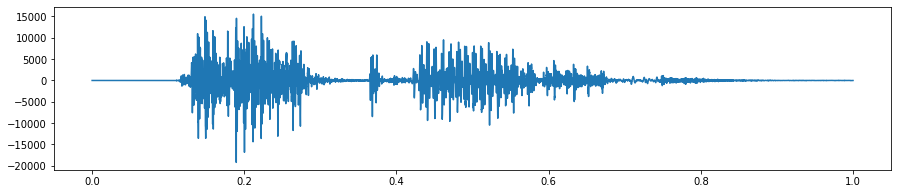

In [5]:
plt.figure(figsize=(15,3))
plt.plot(np.linspace(0, sampling_rate/len(samples), sampling_rate), samples)
plt.show()

In [6]:
sampling_rate, samples = wavfile.read('./data/backward/0a2b400e_nohash_0.wav')
print('Sample rate: ',sampling_rate)
ipd.Audio(samples, rate=sampling_rate)

Sample rate:  16000


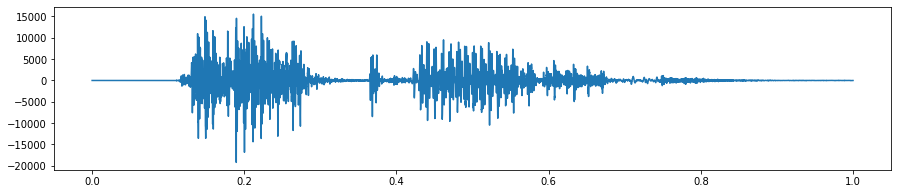

In [7]:
plt.figure(figsize=(15,3))
plt.plot(np.linspace(0, sampling_rate/len(samples), sampling_rate), samples)
plt.show()

#### Load All files

In [8]:
test_list=pd.read_csv('data/testing_list.txt',header=None,names=['all'])
test_list= test_list["all"].str.split("/", n = 1, expand = True) 
test_list.columns=['folder','file']
display(test_list.head())

,folder,file
0,right,bb05582b_nohash_3.wav
1,right,97f4c236_nohash_2.wav
2,right,f2e59fea_nohash_3.wav
3,right,fdb5155e_nohash_2.wav
4,right,dc75148d_nohash_0.wav


In [9]:
val_list=pd.read_csv('data/validation_list.txt',header=None,names=['all'])
val_list= val_list["all"].str.split("/", n = 1, expand = True) 
val_list.columns=['folder','file']
display(val_list.head())

,folder,file
0,right,a69b9b3e_nohash_0.wav
1,right,439c84f4_nohash_1.wav
2,right,409c962a_nohash_1.wav
3,right,dbaf8fc6_nohash_2.wav
4,right,a6d586b7_nohash_1.wav


In [10]:
classes={'backward':0,'bed':1,'bird':2,'cat':3,'dog':4,
         'down':5,'eight':6,'five':7,'follow':8,'forward':9,'four':10,
        'go':11,'happy':12,'house':13,'learn':14,'left':15,'marvin':16,
        'nine':17,'no':18,'off':19,'on':20,'one':21,'right':22,'seven':23,
         'sheila':24,'six':25,'stop':26,'three':27,'tree':28,'two':29,
         'up':30,'visual':31,'wow':32,'yes':33,'zero':34}

In [11]:
def load_folder(path,num,srate,val_names,test_names):
    files = [f for f in listdir(path) if isfile(join(path, f))]
    f_train=np.zeros((0,srate))
    f_val=np.zeros((0,srate))
    f_test=np.zeros((0,srate))
    
    for f in files:
        samples,sampling_rate = librosa.load(path+f,sr=srate)
        #samples = librosa.resample(samples, sampling_rate, 8000
        if len(samples)==srate:
            if f in val_names:
                f_val = np.append(f_val,np.reshape(samples,(1,len(samples))),axis=0)
            elif f in test_names:
                f_test = np.append(f_test,np.reshape(samples,(1,len(samples))),axis=0)
            else:
                f_train = np.append(f_train,np.reshape(samples,(1,len(samples))),axis=0)
                
    lf_train=np.array([num]*len(f_train))
    lf_test=np.array([num]*len(f_test))
    lf_val=np.array([num]*len(f_val))
    
    return lf_train,lf_val,lf_test,f_train,f_val,f_test

In [12]:
srate=16000
data={'train':np.zeros((0,srate)),'val':np.zeros((0,srate)),'test':np.zeros((0,srate))}
labels={'train':np.zeros((0,1)),'val':np.zeros((0,1)),'test':np.zeros((0,1))}

for i, (key, value) in enumerate(classes.items()):
    print('Loading',key)
    path='./data/'+key+'/'
    val_names = val_list.loc[val_list['folder'] == key].iloc[:,1].to_numpy()
    test_names = test_list.loc[test_list['folder'] == key].iloc[:,1].to_numpy()
    lf_train,lf_val,lf_test,f_train,f_val,f_test = load_folder(path,value,srate,val_names,test_names)
    
    data['train']=np.append(data['train'],f_train,axis=0)
    data['val']=np.append(data['val'],f_val,axis=0)
    data['test']=np.append(data['test'],f_test,axis=0)
    
    labels['train']=np.append(labels['train'],lf_train)
    labels['val']=np.append(labels['val'],lf_val)
    labels['test']=np.append(labels['test'],lf_test)

Loading backward
Loading bed
Loading bird
Loading cat
Loading dog
Loading down
Loading eight
Loading five
Loading follow
Loading forward
Loading four
Loading go
Loading happy
Loading house
Loading learn
Loading left
Loading marvin
Loading nine
Loading no
Loading off
Loading on
Loading one
Loading right
Loading seven
Loading sheila
Loading six
Loading stop
Loading three
Loading tree
Loading two
Loading up
Loading visual
Loading wow
Loading yes
Loading zero


In [14]:
data['train']

array([[-6.57653809e-02, -7.09228516e-02, -7.53173828e-02, ...,
        -6.99768066e-02, -7.30590820e-02, -7.04345703e-02],
       [-2.74658203e-04, -2.13623047e-04, -4.57763672e-04, ...,
         5.49316406e-04,  7.01904297e-04,  9.76562500e-04],
       [-6.10351562e-05, -1.83105469e-04, -2.44140625e-04, ...,
        -9.15527344e-05,  2.44140625e-04,  4.27246094e-04],
       ...,
       [ 3.05175781e-05,  0.00000000e+00,  1.52587891e-04, ...,
         3.35693359e-04,  3.05175781e-04,  2.74658203e-04],
       [-2.13623047e-04, -4.27246094e-04, -3.66210938e-04, ...,
         5.79833984e-04,  5.79833984e-04,  4.57763672e-04],
       [-9.76562500e-04, -8.54492188e-04, -1.19018555e-03, ...,
        -6.10351562e-04, -1.28173828e-03, -8.54492188e-04]])

In [16]:
labels['train']
from collections import Counter

In [28]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

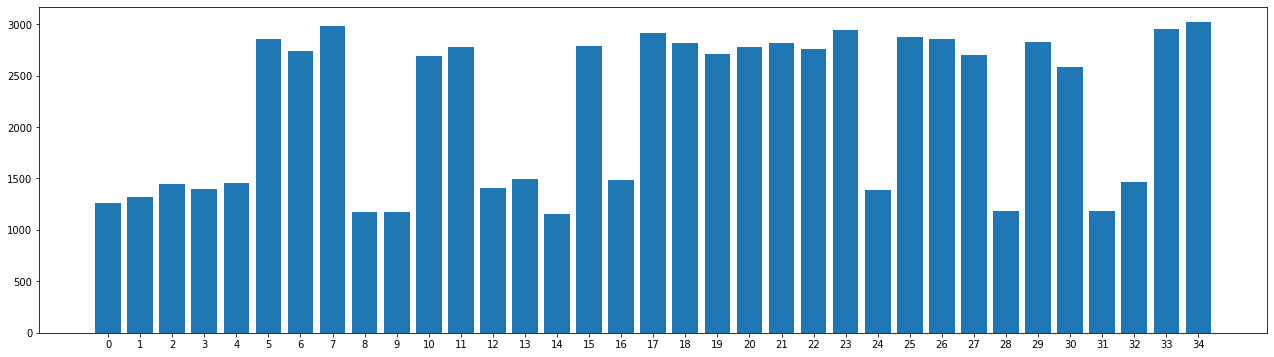

In [39]:
figure(figsize=(22, 6))
plt.bar(Counter(labels['train']).keys(),Counter(labels['train']).values())
plt.xticks(np.linspace(0,34,35))
plt.show()

##### Shuffle data

In [ ]:
len_tr,len_val,len_ts=len(labels['train']),len(labels['val']),len(labels['test'])

rand = np.random.choice(len_tr,len_tr,replace=False)
data['train'],labels['train'] = data['train'][rand],labels['train'][rand].astype(np.int)

In [ ]:
rand = np.random.choice(len_val,len_val,replace=False)
data['val'],labels['val'] = data['val'][rand],labels['val'][rand].astype(np.int)

In [ ]:
rand = np.random.choice(len_ts,len_ts,replace=False)
data['test'],labels['test'] = data['test'][rand],labels['test'][rand].astype(np.int)

In [ ]:
def onehotencoding(array,n):
    L=len(array)
    matrix=np.zeros((L,n)).astype(np.int)
    for i in range(L):
        matrix[i,int(array[i])]=1
    return matrix

In [ ]:
enc = OneHotEncoder()
data['train'] = np.reshape(data['train'],(len(data['train']),16000,1))
labels['train'] = onehotencoding(labels['train'],35)
data['val'] = np.reshape(data['val'],(len(data['val']),16000,1))
labels['val'] = onehotencoding(labels['val'],35)
data['test'] = np.reshape(data['test'],(len(data['test']),16000,1))
labels['test'] = onehotencoding(labels['test'],35)

##### Sanity Check

In [ ]:
for i, (key, value) in enumerate(classes.items()):
    if value==np.argmax(labels['train'][100]):
        print(key)

In [ ]:
ipd.Audio(data['train'][100].flatten(), rate=16000)

In [ ]:
filehandler = open('data.pkl', 'wb') 
pickle.dump(data, filehandler, protocol=4)

In [ ]:
filehandler = open('labels.pkl', 'wb') 
pickle.dump(labels, filehandler, protocol=4)